/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/szabopal/.local/lib/python3.5/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/szabopal/.local/lib/python3.5/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/szabopal/.local/lib/python3.5/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/szabopal/.loca

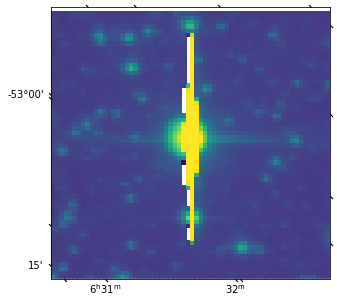

In [23]:
import matplotlib.pyplot as plt
from lightkurve import TessTargetPixelFile
import numpy as np

sector1ffi_cutout='tess-s0001-4-4_83.40630967798376_-62.48977125108528_64x64_astrocut.fits'
tpf_s1 = TessTargetPixelFile(sector1ffi_cutout)

fig = plt.figure(figsize=(5,5))
fig.add_subplot(111, projection=tpf_s1.wcs)
plt.pcolormesh(np.log(tpf_s1.flux[0]))
plt.show()

In [56]:
print(tpf_s1.wcs)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 90.634460449219  -57.666290283203  
CRPIX : 250.0  -984.0  
PC1_1 PC1_2  : 1.0  1.0  
PC2_1 PC2_2  : 1.0  1.0  
CDELT : 0.00571299832697903  0.005705604460241471  
NAXIS : 81986  1282


In [40]:
tpf_s1.hdu.info()

Filename: tess-s0001-4-4_83.40630967798376_-62.48977125108528_64x64_astrocut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      55   ()      
  1  PIXELS        1 BinTableHDU    278   1282R x 12C   ['D', 'E', 'J', '4096J', '4096E', '4096E', '4096E', '4096E', 'J', 'E', 'E', '38A']   
  2  APERTURE      1 ImageHDU       170   (64, 64)   float64   


In [54]:
tpf_s1.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 90.634460449219  -57.666290283203  
CRPIX : 250.0  -984.0  
PC1_1 PC1_2  : 1.0  1.0  
PC2_1 PC2_2  : 1.0  1.0  
CDELT : 0.00571299832697903  0.005705604460241471  
NAXIS : 81986  1282

In [44]:
from astropy.wcs import WCS

In [48]:
tpf_s1.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
ORIGIN  = 'STScI/MAST'         / institution responsible for creating this file 
DATE    = '2018-12-05'         / file creation date.                            
TSTART  =    1325.313100604524 / observation start time in TJD                  
TSTOP   =    1353.167256127407 / observation stop time in TJD                   
DATE-OBS= '2018-07-25T19:29:

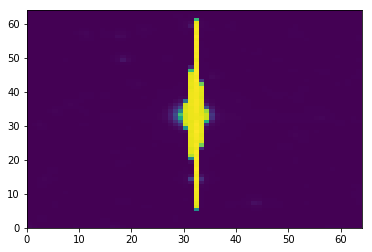

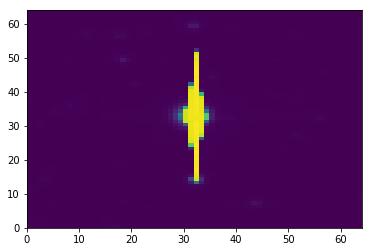

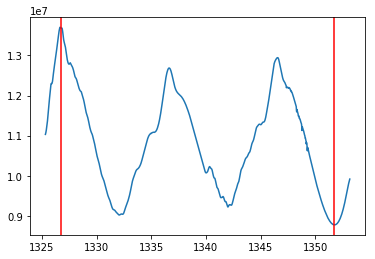

In [4]:
allflux=[]
for each in tpf_s1.flux:
    allflux.append(sum(sum(each)))

times=[]
for index, each in enumerate(tpf_s1.flux):
    if index==70 or index==1200:
        plt.figure()
        plt.pcolormesh(each)
        times.append(tpf_s1.time[index])
        plt.show()
        
plt.plot(tpf_s1.time,allflux)
for each in times:
    plt.axvline(x=each,c='r')

In [9]:
def border(aperture):
    together=[]
    for i, eachline in enumerate(aperture):
        for j, each in enumerate(eachline):
            if each==1:
                together.append([[j,j+1],[i,i]])
                together.append([[j,j+1],[i+1,i+1]])
                together.append([[j,j],[i,i+1]])
                together.append([[j+1,j+1],[i,i+1]])
    filtered=[]
    for each in together:
        c=0
        for EACH in together:
            if each==EACH:
                c+=1
        if c==1:
            filtered.append(each)
            
    return filtered

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from lightkurve import TessTargetPixelFile

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [15]:
coord = SkyCoord(ra=83.40630967798376, dec=-62.48977125108528, unit=(u.degree, u.degree), frame='icrs')
radius = u.Quantity(1.1*32*1.414*21/3600, u.deg)
j = Gaia.cone_search_async(coord, radius)
r = j.get_results()
r.pprint()

Query finished.
         dist          ...
                       ...
---------------------- ...
5.2030643635554925e-06 ...
   0.00327731245051677 ...
  0.009260581924779184 ...
  0.010163180350853781 ...
  0.010232114986970185 ...
  0.010571988517761897 ...
  0.011291259288672972 ...
  0.011409032298542447 ...
  0.011498865367142749 ...
  0.011939990140685754 ...
                   ... ...
    0.2902291779564049 ...
    0.2902449607200544 ...
    0.2902527586203929 ...
   0.29025309481944134 ...
    0.2902618478458813 ...
    0.2902619481335399 ...
     0.290263731695323 ...
   0.29029045137346954 ...
   0.29032678519836996 ...
    0.2903327504180711 ...
Length = 15717 rows


In [17]:
extractedgaiadata=[
r[(r['phot_g_mean_mag'] < 17)]['source_id'],
r[(r['phot_g_mean_mag'] < 17)]['ra'],
r[(r['phot_g_mean_mag'] < 17)]['dec'],
r[(r['phot_g_mean_mag'] < 17)]['phot_g_mean_mag'],
r[(r['phot_g_mean_mag'] < 17)]['phot_rp_mean_mag']]

In [19]:
sizearray=[]
for index, each in enumerate(extractedgaiadata[4]):
    if np.isscalar(each):
        sizearray.append(each)
    else:
        sizearray.append(extractedgaiadata[3][index])
brightness=np.asarray(sizearray)
sizearray=np.asarray(sizearray)

In [20]:
sizearray = 60*(np.max(sizearray)-sizearray)

In [21]:
for eachindex in [954,1200]:
    
    proportiontosee=0.5

    fig = plt.figure(figsize=(12*proportiontosee,12))
    fig.add_subplot(111, projection=tpf_s1.wcs)

    #plt.figure(figsize=(12,12))
    plt.pcolormesh(np.log(tpf_s1.flux[eachindex]))

    #filtered=border(tpf_s1.pipeline_mask*1)
    #for x in range(len(filtered)):
    #    plt.plot(np.asarray(filtered[x][0])+19,np.asarray(filtered[x][1])+1,c='red', linewidth=7)




    spocaper=np.genfromtxt('betador_s0001_spocaperture_shiftedup.txt')
    spocaper=np.asarray(spocaper)
    spocaper=(spocaper == 75)*1
    filtered_spoc=border(spocaper)
    for x in range(len(filtered_spoc)):
        plt.plot(np.asarray(filtered_spoc[x][0])+19,np.asarray(filtered_spoc[x][1])+1,c='magenta', linewidth=7)



    customaper=np.genfromtxt('betador_s0001_customaperture_shiftedup.txt')
    customaper=np.asarray(customaper)
    customaper=(customaper == 3)*1
    filtered_custom=border(customaper)
    for x in range(len(filtered_custom)):
        plt.plot(np.asarray(filtered_custom[x][0])+19,np.asarray(filtered_custom[x][1])+1,c='black', linewidth=4.5)



    #filtered_ourap=border(ourap)
    #for x in range(len(filtered_ourap)):
    #    plt.plot(np.asarray(filtered_ourap[x][0])+19,np.asarray(filtered_ourap[x][1])+1,c='palegreen', linewidth=3)

    ax = fig.gca()
    for x in range(len(extractedgaiadata[0])):
        ax.scatter(extractedgaiadata[1][x], extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])
    #    if brightness[x]<12:
    #        ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

    #for x in range(len(extractedgaiadata[0])):
    #    ax.scatter(extractedgaiadata[1][x]-0.5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='white',s=sizearray[x])        

    for x in range(len(extractedgaiadata[0])):
        ax.scatter(extractedgaiadata[1][x]+5*21/3600, extractedgaiadata[2][x],transform=ax.get_transform('world'),marker='+',c='red',s=sizearray[x])        
        if extractedgaiadata[0][x] in [4757603069845798272,4757601523650165120,4757588531379585152]:
            ax.text(extractedgaiadata[1][x], extractedgaiadata[2][x],extractedgaiadata[0][x],transform=ax.get_transform('world'),bbox=dict(facecolor='white', alpha=0.5))

    ax.set_xlim([64*(1-proportiontosee)/2, 64*(1+proportiontosee)/2])
    ax.set_ylim([0, 70])

    ax.coords.grid(True, color='green', ls='solid')
    
    plt.show()

/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/home/szabopal/.local/lib/python3.5/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/szabopal/.local/lib/python3.5/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
/home/szabopal/.local/lib/python3.5/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuou

RuntimeError: libpng signaled error

<Figure size 432x864 with 1 Axes>

/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/szabopal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':
/home/szabopal/.local/lib/python3.5/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
/home/szabopal/.local/lib/python3.5/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuous = step[1:] > DISCONT_FACTOR * step[:-1]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
/home/szabopal/.local/lib/python3.5/site-packages/astropy/visualization/wcsaxes/grid_paths.py:73: RuntimeWarning: invalid value encountered in greater
  discontinuou

RuntimeError: libpng signaled error

<Figure size 432x864 with 1 Axes>